In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from numpy.random import choice
from sklearn.metrics import pairwise_distances_argmin
import random
from sklearn.metrics import adjusted_rand_score, silhouette_samples

## Базовая реализация k-means

In [2]:
def kmeans_find_clusters(X, n_clusters, iter_num=50):
    # 1. Randomly choose clusters

    ind = np.random.permutation(X.shape[0])[:n_clusters]
    centers = X[ind]
    
    for _ in range(iter_num):
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

In [3]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [4]:
centers, labels = kmeans_find_clusters(digits.data, n_clusters=10, iter_num=50)
centers.shape

(10, 64)

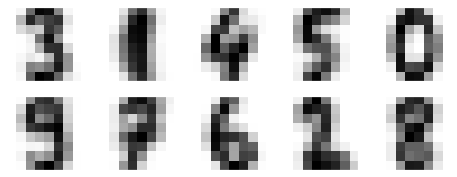

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers_img = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers_img):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Точность кластеризации с помощью accuracy

In [6]:
from scipy.stats import mode

labels_dig = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)
    labels_dig[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels_dig)

0.8697829716193656

##  Adjusted Rand index

In [7]:
adjusted_rand_score(digits.target, labels_dig)

0.741218365509989

## Silhouette Coefficient

In [8]:
np.mean(silhouette_samples(digits.data, labels))

0.17676828496606725

## K++ means

In [9]:
def k_plusplus_means_find_clusters(X, n_clusters, iter_num=50):
    # 1. Randomly choose 1 center
    ind = random.randint(0, len(X) - 1)
    centers = [X[ind]]
    distance = np.array(cdist(X, centers)).T #distances between centers and points
    min_distance_1 = distance[0] #distances to the closest centers
    
    for i in range(1, n_clusters):
        distance = np.array(cdist(X, centers)).T
        min_distance = distance[0]
        for j in range(len(distance)):
            for k in range(len(min_distance)):
                min_distance[k] = min(min_distance[k], distance[j][k])
        min_distance = np.array(min_distance)**2
        indexes = np.arange(0, len(X))
        tmp = choice(indexes, p=min_distance/np.sum(min_distance)) #choose with prob=distance^2
        centers.append(X[tmp]) # add new center


    
    for _ in range(iter_num):
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

## Датасет MNIST

In [10]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
centers, labels = k_plusplus_means_find_clusters(digits.data, n_clusters=10, iter_num=50)
centers.shape

(10, 64)

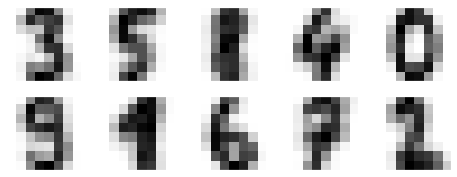

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers_img = centers.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers_img):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Точность кластеризации с помощью accuracy

In [13]:
from scipy.stats import mode

labels_dig = np.zeros_like(labels)
for i in range(10):
    mask = (labels == i)
    labels_dig[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels_dig)

0.7907623817473567

## Adjusted Rand index

In [14]:
adjusted_rand_score(digits.target, labels_dig)

0.6587557227833584

## Silhouette Coefficient

In [15]:
np.mean(silhouette_samples(digits.data, labels))

0.1821829565174138